In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore',category=UserWarning)
%matplotlib inline

In [ ]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=0)

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# **Task 1: Single Linear Regression**

In [ ]:
lm=LinearRegression()
X=df[['CPU_frequency']]
Y=df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)

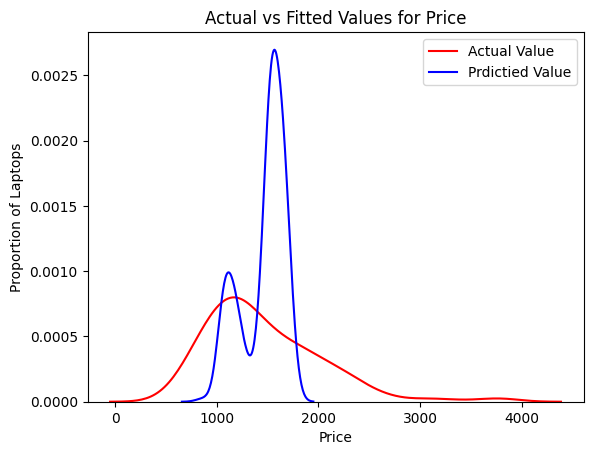

In [ ]:
ax1=sns.distplot(df['Price'],hist=False,color='r',label='Actual Value')

sns.distplot(Yhat,hist=False,color='b',label='Fitted Values',ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend(['Actual Value','Prdictied Value'])
plt.show()

In [ ]:
mse_slr=mean_squared_error(df['Price'],Yhat)
r2_score_slr=lm.score(X,Y)
print(r2_score_slr)
print(mse_slr)

0.1344436321024326
284583.4405868629


# **Task 2 - Multiple Linear Regression**

In [ ]:
lm1=LinearRegression()
Z=df[['CPU_frequency','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat=lm1.predict(Z)

Text(0, 0.5, 'Proprtion of laptops')

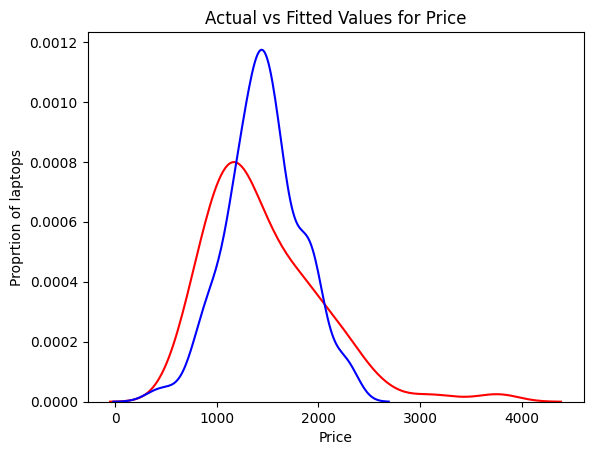

In [ ]:
ax1=sns.distplot(df['Price'],hist=False,color='r',label='Actual Value')
sns.distplot(Y_hat,hist=False,color='b',label='Fitted Values',ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proprtion of laptops')

In [ ]:
lm1.score(Z,Y)

0.40908461194672785

In [ ]:
mean_squared_error(Y,Yhat)

284583.4405868629

# **Task 3 - Polynomial Regression**

In [ ]:
X=X.to_numpy().flatten()
f1=np.polyfit(X,Y,1)
p1=np.poly1d(f1)

f3=np.polyfit(X,Y,3)
p3=np.poly1d(f3)

f5=np.polyfit(X,Y,5)
p5=np.poly1d(f5)

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

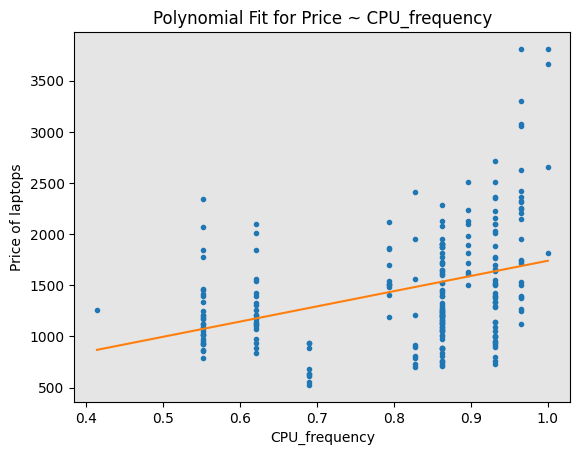

In [ ]:
PlotPolly(p1,X,Y,'CPU_frequency')

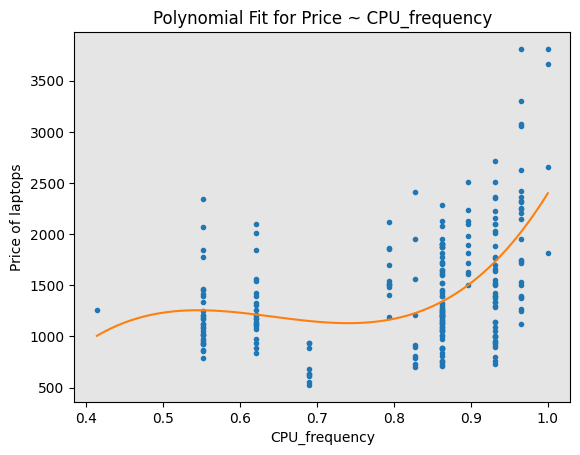

In [ ]:
PlotPolly(p3,X,Y,'CPU_frequency')

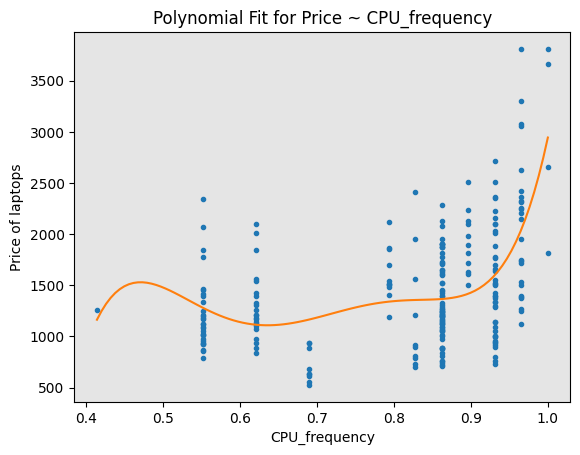

In [ ]:
PlotPolly(p5,X,Y,'CPU_frequency')

In [ ]:
r_sq_1=r2_score(Y,p1(X))
print('r_sq_1: ',r_sq_1)
print('mse_1: ',mean_squared_error(Y,p1(X)))
print()

r_sq_3=r2_score(Y,p3(X))
print('r_sq_3: ',r_sq_3)
print('mse_3: ',mean_squared_error(Y,p3(X)))
print()

r_sq_5=r2_score(Y,p5(X))
print('r_sq_5: ',r_sq_5)
print('mse_5: ',mean_squared_error(Y,p5(X)))
print()

r_sq_1:  0.1344436321024326
mse_1:  284583.4405868629

r_sq_3:  0.26692640796531175
mse_3:  241024.86303848747

r_sq_5:  0.3030822706443108
mse_5:  229137.2954805611



# **Task 4 - Pipeline**

In [ ]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
Z=Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [ ]:
print(mean_squared_error(Y,ypipe))
print(r2_score(Y,ypipe))

145769.96003889837
0.556642800791035
